### 1. Importing all the essential libraries

In [ ]:
# Importing libraries
import string
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import pipeline
import itertools
import pickle

### 2. Loading the data

In [ ]:
# Loading data
indonesian_df = pd.read_csv("/content/indonesian.csv", header=None, names=['indonesian'])
javanese_df = pd.read_csv("/content/javanese.csv", header=None, names=['javanese'])
sundanese_df = pd.read_csv("/content/sundanese.csv", header=None, names=['sundanese'])

In [ ]:
# Loading indonesian raw data
indonesian_df.head()

,indonesian
0,(air) susu dibalas dng (air) tuba
1,(bagai) duri dalam daging
2,(me)rentan hati
3,(persetujuan) masih di perawanan
4,(sbg durian) pangsa menunjukkan bangsa (sbg du...


In [ ]:
# Loading raw javanese data
javanese_df.head()

,javanese
0,(banyu) susu dijawab (banyu) tuba
1,(kaya) eri ing daging
2,(kula) rawan karo ati
3,(Persetujuan) isih ana kerentanan
4,(minangka Durian) Berbagi nuduhake bangsa (min...


In [ ]:
# Loading raw sundanese data
sundanese_df.head()

,sundanese
0,(cai) susu ngawaler (cai) Tuba
1,(sapertos) cucuk dina daging
2,(kuring) rentan ka jantung
3,(Persetujuan) masih aya dina kerentanan
4,(sakumaha Durian) Bagikeun nunjukkeun bangsa (...


### 3. Data Preprocessing

In [ ]:
# Data preprocessing
def clean_data(df, lang):
    data = []
    lang_list = []

    for i, row in df.iterrows():
        line = row[lang]

        if isinstance(line, str):
            line = line.lower()
            line = re.sub(r"\d+", "", line)
            line = line.translate(str.maketrans("", "", string.punctuation))
            data.append(line)
            lang_list.append(lang)

    return data, lang_list

In [ ]:
data_indo, lang_indo = clean_data(indonesian_df, 'indonesian')
data_jawa, lang_jawa = clean_data(javanese_df, 'javanese')
data_sunda, lang_sunda = clean_data(sundanese_df, 'sundanese')

### 4. Transforming the data into a single dataset

In [ ]:
# Transforming data into a single dataset
df = pd.DataFrame({
    "Text": data_indo + data_jawa + data_sunda,
    "Language": lang_indo + lang_jawa + lang_sunda
})

In [ ]:
df.head()

,Text,Language
0,air susu dibalas dng air tuba,indonesian
1,bagai duri dalam daging,indonesian
2,merentan hati,indonesian
3,persetujuan masih di perawanan,indonesian
4,sbg durian pangsa menunjukkan bangsa sbg duria...,indonesian


In [ ]:
df.tail()

,Text,Language
315669,itqn mnt anār,sundanese
315670,izzatu annafsi,sundanese
315671,izzulislām walmuslimīn,sundanese
315672,ṭfaturraḥmān,sundanese
315673,ālam arḥḥ,sundanese


In [ ]:
df['Language'].value_counts()

javanese      105225
sundanese     105225
indonesian    105224
Name: Language, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

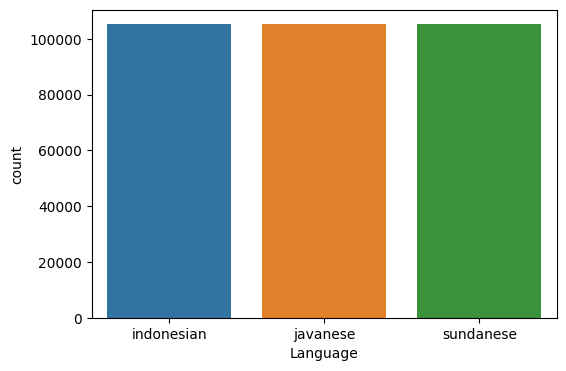

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x = df['Language'], data=df)

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [ ]:
# Splitting the dataset
x = df['Text']
y = df['Language']

In [ ]:
x.head()

0                        air susu dibalas dng air tuba
1                              bagai duri dalam daging
2                                        merentan hati
3                       persetujuan masih di perawanan
4    sbg durian pangsa menunjukkan bangsa sbg duria...
Name: Text, dtype: object

In [ ]:
y.head()

0    indonesian
1    indonesian
2    indonesian
3    indonesian
4    indonesian
Name: Language, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Applying TF-IDF Vectorizer

* `ngram_range` : It collets one , one two, one two three words
* `analyzer` : We are not going word by word here we are going character by character that why we have used **char**.

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='char')

# Modeling

## MLP Model

In [ ]:
pipe_mlp = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MLPClassifier(max_iter=10))  # Set max_iter as needed
])

In [ ]:
pipe_mlp.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MLPClassifier(max_iter=10))])

In [ ]:
mlp_predicted = pipe_mlp.predict(x_test)

In [ ]:
mlp_acc = (metrics.accuracy_score(y_test, mlp_predicted))*100
print('The Multi Layer Perceptron has :',mlp_acc,'% accuracy')

The Multi Layer Perceptron has : 58.532464652650916 % accuracy


## MultinomialNB Model

In [ ]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [ ]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [ ]:
# mnbfile = open('model/mnbmodel.pckl', 'wb')
# pickle.dump(pipe_mnb, mnbfile)
# mnbfile.close()

In [ ]:
mnb_predicted = pipe_mnb.predict(x_test)

In [ ]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 53.59492307529856 % accuracy


## Logistic Regression Model

In [ ]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression(max_iter=10))  # Set max_iter as needed
])

In [ ]:
pipe_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression(max_iter=10))])

In [ ]:
lr_predicted = pipe_lr.predict(x_test)

In [ ]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted)) * 100
print('The logistic regression has:', lr_acc, '% accuracy')

The logistic regression has: 52.917014244532915 % accuracy


# Evaluation

## Model Comparison

<Axes: xlabel='Model', ylabel='Accuracy'>

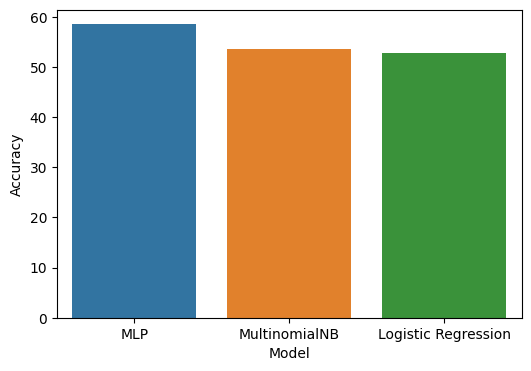

In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['MLP', 'MultinomialNB', 'Logistic Regression'],
    'Accuracy': [mlp_acc, mnb_acc, lr_acc]
})
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=model_comparison)

## Confusion Matrix for MLP

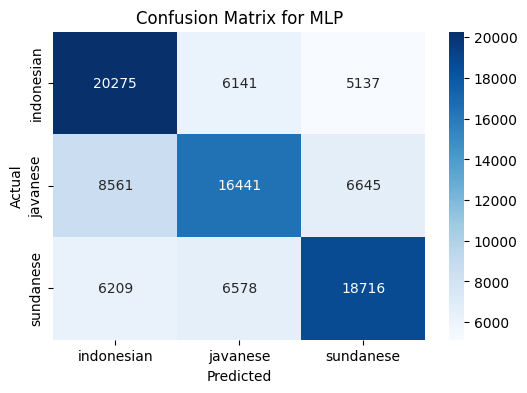

In [ ]:
# Confusion matrix for MLP
mlp_matrix = metrics.confusion_matrix(y_test, mlp_predicted)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(mlp_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=pipe_mlp.classes_, yticklabels=pipe_mlp.classes_)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Export Model

In [ ]:
pickle.dump(pipe_mlp,open('mlp_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))